# Data loading

In [2]:
print("Hello Jupyter")


Hello Jupyter


In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)

numpy: 2.2.6
pandas: 2.3.1
matplotlib: 3.10.5
seaborn: 0.13.2


In [4]:

df = pd.read_csv("mesa_agent_results.csv")
df.head()


,step,datetime,agent_id,agent_type,room,occupant_count,current_temp,comfort_level,using_ac,preferred_temp,action
0,0,01/12 00:15:00,139,visitor,West Zone,68,23.04,2.61,False,25.64,NaN
1,0,01/12 00:15:00,72,student,West Zone,68,23.04,2.56,False,25.60,NaN
2,0,01/12 00:15:00,107,staff,West Zone,68,23.04,2.14,False,25.17,NaN
3,0,01/12 00:15:00,61,student,West Zone,68,23.04,1.98,False,25.02,NaN
4,0,01/12 00:15:00,2,student,East Zone,74,45.57,20.95,True,24.62,NaN


In [5]:
df.shape


(763392, 11)

In [7]:
import pandas as pd

df['datetime'] = pd.to_datetime(df['datetime'], format="%m/%d %H:%M:%S", errors='coerce')


In [8]:
invalid_rows = df[df['datetime'].isna()]
print("จำนวนแถว datetime ผิดปกติ:", len(invalid_rows))


จำนวนแถว datetime ผิดปกติ: 763392


In [9]:
import pandas as pd

start_datetime = pd.to_datetime("01/12 00:15:00", format="%m/%d %H:%M:%S")
timestep_min = 15

df['datetime'] = start_datetime + pd.to_timedelta(df['step'] * timestep_min, unit='m')


In [10]:
print(df[['step','datetime']].head(10))
print(df[['step','datetime']].tail(10))


   step            datetime
0     0 1900-01-12 00:15:00
1     0 1900-01-12 00:15:00
2     0 1900-01-12 00:15:00
3     0 1900-01-12 00:15:00
4     0 1900-01-12 00:15:00
5     0 1900-01-12 00:15:00
6     0 1900-01-12 00:15:00
7     0 1900-01-12 00:15:00
8     0 1900-01-12 00:15:00
9     0 1900-01-12 00:15:00
        step   datetime
763382  1343 1900-01-26
763383  1343 1900-01-26
763384  1343 1900-01-26
763385  1343 1900-01-26
763386  1343 1900-01-26
763387  1343 1900-01-26
763388  1343 1900-01-26
763389  1343 1900-01-26
763390  1343 1900-01-26
763391  1343 1900-01-26


In [11]:
df.head()

,step,datetime,agent_id,agent_type,room,occupant_count,current_temp,comfort_level,using_ac,preferred_temp,action
0,0,1900-01-12 00:15:00,139,visitor,West Zone,68,23.04,2.61,False,25.64,NaN
1,0,1900-01-12 00:15:00,72,student,West Zone,68,23.04,2.56,False,25.60,NaN
2,0,1900-01-12 00:15:00,107,staff,West Zone,68,23.04,2.14,False,25.17,NaN
3,0,1900-01-12 00:15:00,61,student,West Zone,68,23.04,1.98,False,25.02,NaN
4,0,1900-01-12 00:15:00,2,student,East Zone,74,45.57,20.95,True,24.62,NaN


In [19]:
df.isnull().sum()

step              0
agent_id          0
agent_type        0
room              0
comfort_level     0
using_ac          0
preferred_temp    0
dtype: int64

In [22]:
df['comfort_level'] = df['comfort_level'].fillna(0)

In [23]:
df.dtypes

step                int64
agent_id            int64
agent_type         object
room               object
comfort_level     float64
using_ac             bool
preferred_temp    float64
dtype: object

In [25]:
df.describe()

,step,agent_id,comfort_level,preferred_temp
count,28000.000000,28000.00000,28000.000000,28000.000000
mean,99.500000,69.50000,12.330187,24.989429
std,57.735336,40.41421,10.272742,0.614170
min,0.000000,0.00000,0.000000,24.000000
25%,49.750000,34.75000,1.450000,24.407500
50%,99.500000,69.50000,19.650000,25.010000
75%,149.250000,104.25000,21.720000,25.500000
max,199.000000,139.00000,26.310000,25.990000


# Analysis

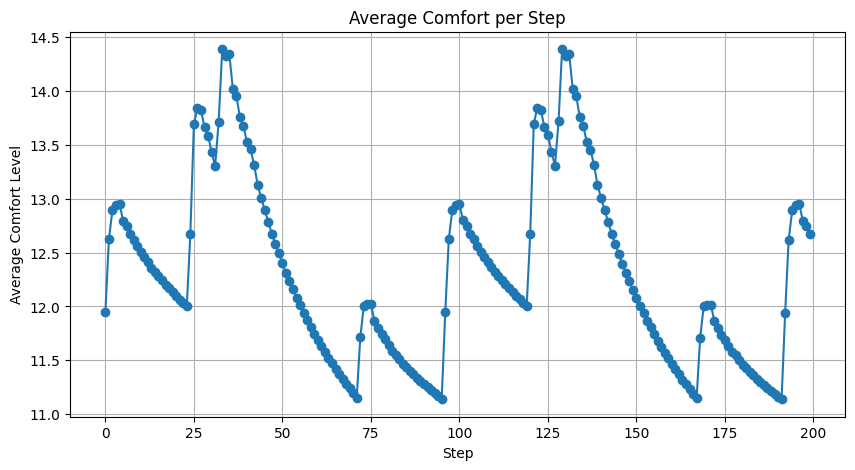

In [13]:
avg_comfort = df.groupby("step")["comfort_level"].mean()
plt.figure(figsize=(10,5))
plt.plot(avg_comfort.index, avg_comfort.values, marker="o")
plt.xlabel("Step")
plt.ylabel("Average Comfort Level")
plt.title("Average Comfort per Step")
plt.grid(True)
plt.show()


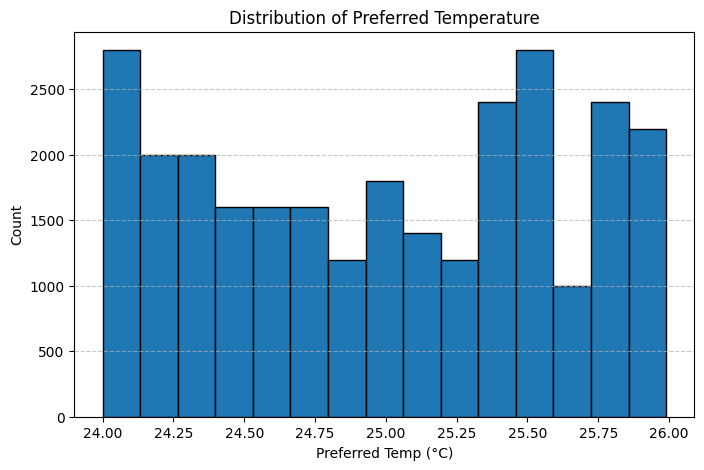

In [14]:
plt.figure(figsize=(8,5))
plt.hist(df["preferred_temp"].to_numpy(), bins=15, edgecolor="black")
plt.xlabel("Preferred Temp (°C)")
plt.ylabel("Count")
plt.title("Distribution of Preferred Temperature")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


<Figure size 800x500 with 0 Axes>

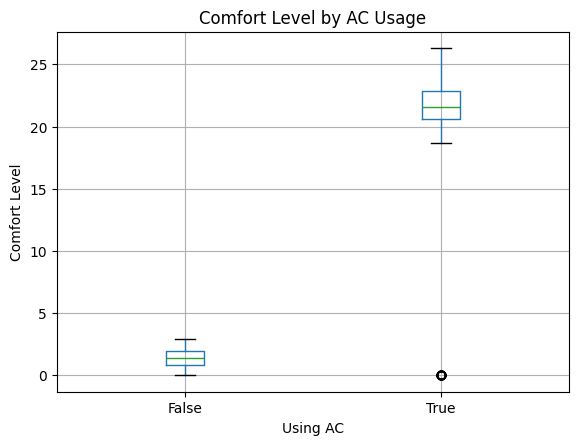

In [15]:
plt.figure(figsize=(8,5))
df.boxplot(column="comfort_level", by="using_ac")
plt.title("Comfort Level by AC Usage")
plt.suptitle("")
plt.xlabel("Using AC")
plt.ylabel("Comfort Level")
plt.show()


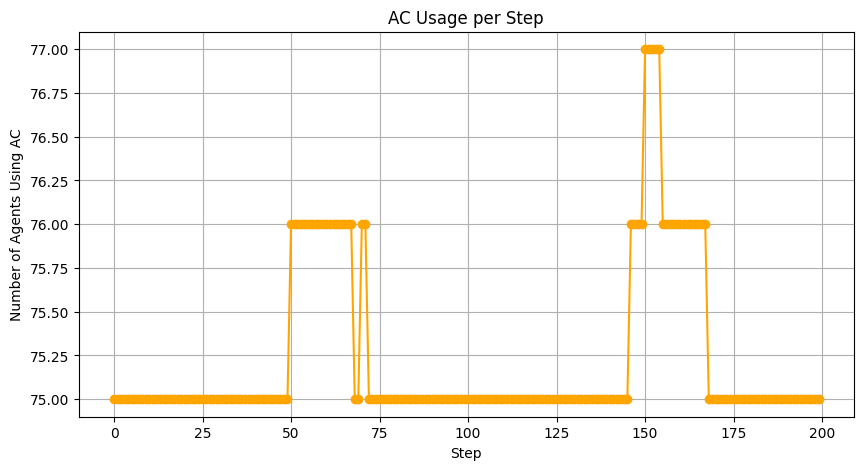

In [16]:
ac_usage = df.groupby("step")["using_ac"].sum()  # จำนวน agent ที่เปิด AC
plt.figure(figsize=(10,5))
plt.plot(ac_usage.index, ac_usage.values, marker="o", color="orange")
plt.xlabel("Step")
plt.ylabel("Number of Agents Using AC")
plt.title("AC Usage per Step")
plt.grid(True)
plt.show()
